# Visualizing CARTs with admissions data

Using the admissions data from earlier in the course, build CARTs, look at how they work visually, and compare their performance to more standard, parametric models.


---

### Install and load the packages required to visually show decision tree branching

You will need to first:

1. Install `graphviz` with homebrew (on OSX - not sure what linux uses). The command will be `brew install graphviz`
- Install `pydotplus` with `pip install pydotplus`
- Load the packages as shown below (you may need to restart the kernel after the installations.)

In [1]:
# !pip install pydotplus

In [1]:
# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

---

### Load in admissions data and other python packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
admit = pd.read_csv('./assets/admissions.csv')

---

### Create regression and classification X, y data

The regression data will be:

    Xr = [admit, gre, prestige]
    yr = gpa
    
The classification data will be:

    Xc = [gre, gpa, prestige]
    yc = admit

In [4]:
admit = admit.dropna()

In [5]:
admit.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [6]:
Xr = admit[['admit','gre','prestige']]
yr = admit.gpa.values

Xc = admit[['gpa','gre','prestige']]
yc = admit.admit.values

---

### Cross-validate regression and logistic regression on the data

Fit a linear regression for the regression problem and a logistic for the classification problem. Cross-validate the R2 and accuracy scores.

In [7]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [8]:
reg_scores = cross_val_score(LinearRegression(), Xr, yr, cv=4)
cls_scores = cross_val_score(LogisticRegression(), Xc, yc, cv=4)

print reg_scores, np.mean(reg_scores)
print cls_scores, np.mean(cls_scores)

linreg = LinearRegression().fit(Xr, yr)
logreg = LogisticRegression().fit(Xc, yc)

[ 0.22470964  0.08296819  0.03204903  0.16434809] 0.12601873539
[ 0.71        0.72        0.68686869  0.70408163] 0.70523757988


---

### Building regression trees

With `DecisionTreeRegressor`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
dtr1 = DecisionTreeRegressor(max_depth=1)
dtr2 = DecisionTreeRegressor(max_depth=2)
dtr3 = DecisionTreeRegressor(max_depth=3)
dtrN = DecisionTreeRegressor(max_depth=None)

In [11]:
dtr1.fit(Xr, yr)
dtr2.fit(Xr, yr)
dtr3.fit(Xr, yr)
dtrN.fit(Xr, yr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
dtr1_scores = cross_val_score(dtr1, Xr, yr, cv=4)
dtr2_scores = cross_val_score(dtr2, Xr, yr, cv=4)
dtr3_scores = cross_val_score(dtr3, Xr, yr, cv=4)
dtrN_scores = cross_val_score(dtrN, Xr, yr, cv=4)

print dtr1_scores, np.mean(dtr1_scores)
print dtr2_scores, np.mean(dtr2_scores)
print dtr3_scores, np.mean(dtr3_scores)
print dtrN_scores, np.mean(dtrN_scores)

[ 0.16618105  0.1535036   0.03860296  0.10081223] 0.114774961104
[ 0.20722899  0.14179888  0.04112242  0.11836674] 0.127129257986
[ 0.15422529  0.123802    0.05252648  0.08070045] 0.102813557478
[-0.1467712  -0.15842446 -0.46474653 -0.17945056] -0.237348185859


---

### Visualizing the regression tree decisions

Use the template code below to create charts that show the logic/branching of your four decision tree regressions from above.

#### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node

In [ ]:
import graphviz

In [48]:
# #Looks like this code doesn't work :(


# # TEMPLATE CODE

# # initialize the output file object
# dot_data = StringIO() 

# # my fit DecisionTreeRegressor object here is: dtr1
# # for feature_names i put the columns of my Xr matrix
# export_graphviz(dtr1, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,
#                 feature_names=Xr.columns)  

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

TypeError: __init__() takes exactly 1 argument (2 given)

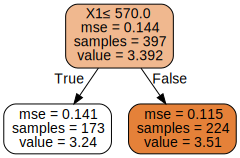

In [23]:
# I'm gonna use the code from lecture 6.06

export_graphviz(dtr1, out_file="mytree.dot", 
                    filled=True, rounded=True,
                    special_characters=True)
with open("mytree.dot") as f:
        dot_graph = f.read()
display(graphviz.Source(dot_graph))

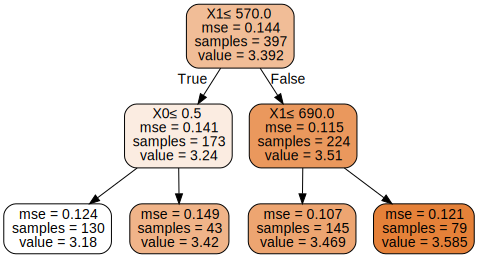

In [24]:
export_graphviz(dtr2, out_file="mytree.dot", 
                    filled=True, rounded=True,
                    special_characters=True)
with open("mytree.dot") as f:
        dot_graph = f.read()
display(graphviz.Source(dot_graph))

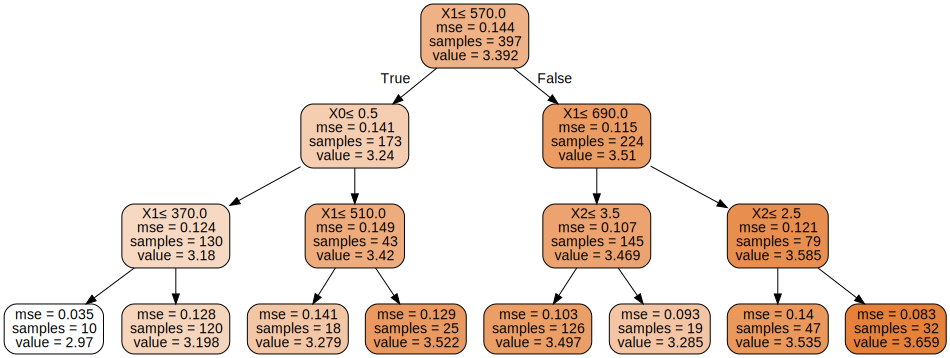

In [25]:
export_graphviz(dtr3, out_file="mytree.dot", 
                    filled=True, rounded=True,
                    special_characters=True)
with open("mytree.dot") as f:
        dot_graph = f.read()
display(graphviz.Source(dot_graph))

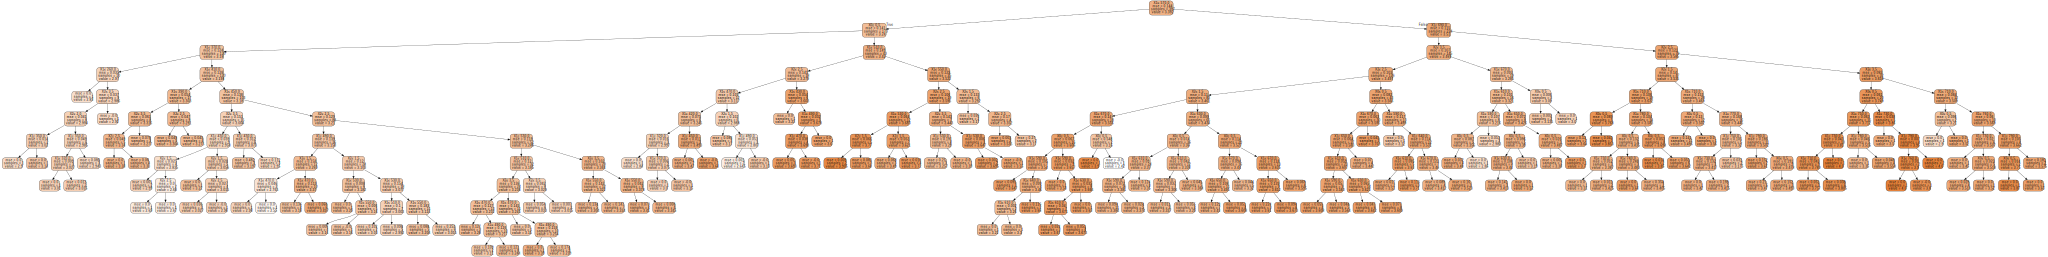

In [26]:
export_graphviz(dtrN, out_file="mytree.dot", 
                    filled=True, rounded=True,
                    special_characters=True)
with open("mytree.dot") as f:
        dot_graph = f.read()
display(graphviz.Source(dot_graph))

---

### Building classification trees

With `DecisionTreeClassifier`:

1. Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

Note that now you'll be using the classification task where we are predicting `admit`.

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc3 = DecisionTreeClassifier(max_depth=3)
dtcN = DecisionTreeClassifier(max_depth=None)

In [30]:
dtc1.fit(Xc, yc)
dtc2.fit(Xc, yc)
dtc3.fit(Xc, yc)
dtcN.fit(Xc, yc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
dtc1_scores = cross_val_score(dtc1, Xc, yc, cv=4)
dtc2_scores = cross_val_score(dtc2, Xc, yc, cv=4)
dtc3_scores = cross_val_score(dtc3, Xc, yc, cv=4)
dtcN_scores = cross_val_score(dtcN, Xc, yc, cv=4)

print dtc1_scores, np.mean(dtc1_scores)
print dtc2_scores, np.mean(dtc2_scores)
print dtc3_scores, np.mean(dtc3_scores)
print dtcN_scores, np.mean(dtcN_scores)

[ 0.68        0.68        0.66666667  0.68367347] 0.677585034014
[ 0.69        0.77        0.62626263  0.62244898] 0.677177901464
[ 0.77        0.77        0.60606061  0.70408163] 0.712535559678
[ 0.6         0.67        0.57575758  0.54081633] 0.596643475572


---

### Visualize the classification trees

The plotting code will be the same as for regression, you just need to change the model you're using for each plot and the feature names.

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells you the count of each class at that node.

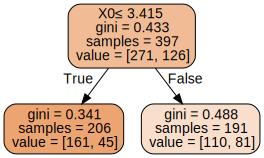

In [32]:
export_graphviz(dtc1, out_file="mytree.dot", 
                    filled=True, rounded=True,
                    special_characters=True)
with open("mytree.dot") as f:
        dot_graph = f.read()
display(graphviz.Source(dot_graph))

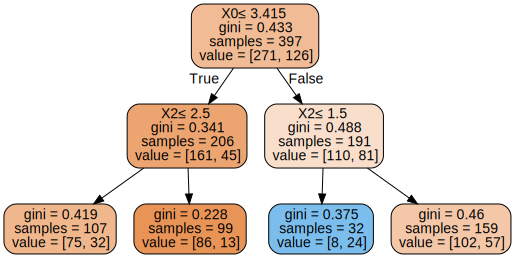

In [33]:
export_graphviz(dtc2, out_file="mytree.dot", 
                    filled=True, rounded=True,
                    special_characters=True)
with open("mytree.dot") as f:
        dot_graph = f.read()
display(graphviz.Source(dot_graph))

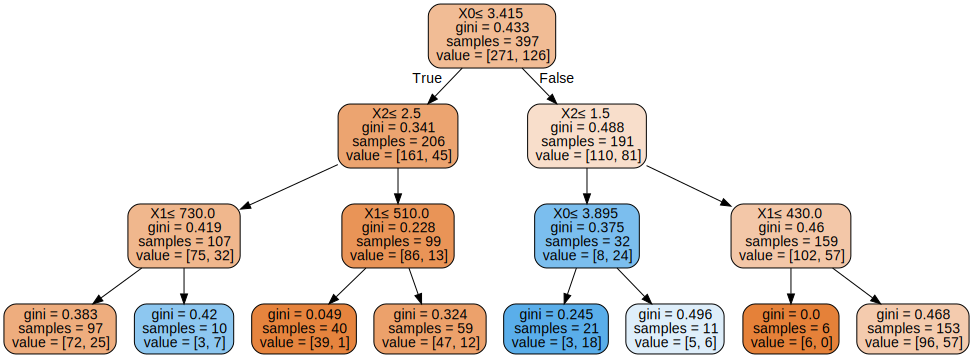

In [34]:
export_graphviz(dtc3, out_file="mytree.dot", 
                    filled=True, rounded=True,
                    special_characters=True)
with open("mytree.dot") as f:
        dot_graph = f.read()
display(graphviz.Source(dot_graph))

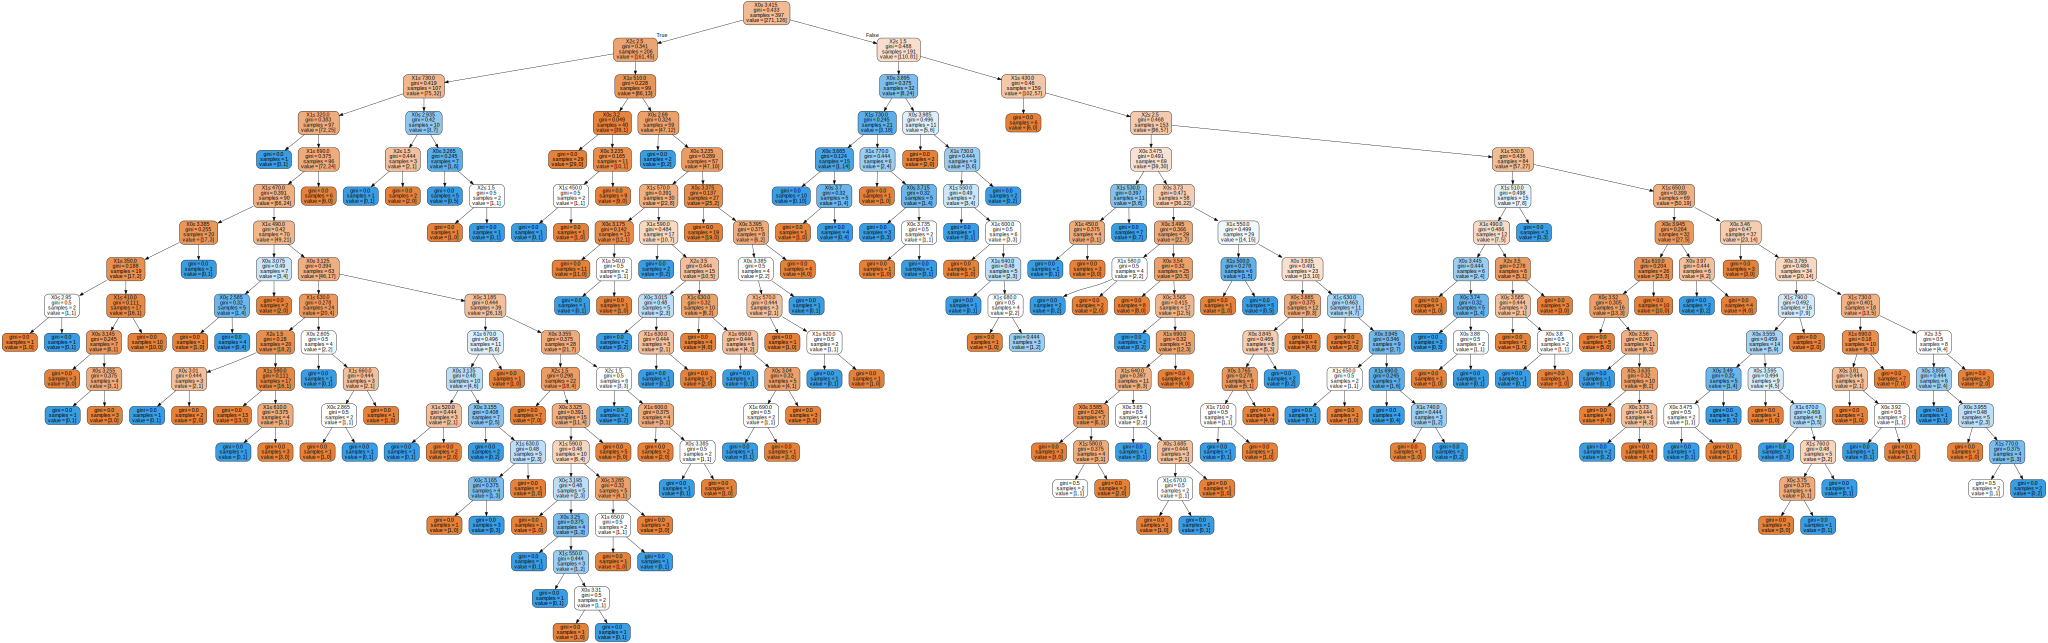

In [35]:
export_graphviz(dtcN, out_file="mytree.dot", 
                    filled=True, rounded=True,
                    special_characters=True)
with open("mytree.dot") as f:
        dot_graph = f.read()
display(graphviz.Source(dot_graph))

---

### Using GridSearchCV to find the best decision tree classifier

Decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting the how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

It is not always best to search over _all_ of these in a grid search, unless you have a small dataset. Many of them while not redundant are going to have very similar effects on your model's fit.

Check out the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---

## Switch over to the college stats dataset for the rest of the lab.

We are going to be predicting whether or not a college is public or private. Set up your `X`, `y` variables accordingly.

In [38]:
import pandas as pd
col = pd.read_csv('./assets/college.csv')

In [39]:
col.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [56]:
y = col.Private.map(lambda x: 1 if x == 'Yes' else 0)
X = col.iloc[:, 2:]

---

### Set up and run the GridSearch on the college data, building the best decision tree classifier.

In [44]:
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV

dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5, verbose=1)

In [45]:
dtc_gs.fit(X, y)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=1)]: Done 1925 out of 1925 | elapsed:    6.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [46]:
dtc_best = dtc_gs.best_estimator_
print dtc_gs.best_params_
print dtc_gs.best_score_

{'max_features': 'log2', 'min_samples_split': 15, 'max_depth': 3}
0.918918918919


### Build a bagging classifier using GridSearchCV.

In [58]:
bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}
    

from sklearn.ensemble import BaggingClassifier

bc_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=5, verbose=1)

In [60]:
%%time
bc_gs.fit(X, y)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


[Parallel(n_jobs=1)]: Done 43200 out of 43200 | elapsed: 21.6min finished


CPU times: user 21min 11s, sys: 6.85 s, total: 21min 18s
Wall time: 21min 36s


GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [2, 5, 10, 20], 'max_samples': [0.5, 0.7, 1.0], 'base_estimator__min_samples_split': [2, 5, 7], 'base_estimator__max_depth': [3, 5, 10, 20], 'bootstrap_features': [False, True], 'max_features': [0.5, 0.7, 1.0], 'base_estimator__min_samples_leaf': [1, 3, 5, 7, 10], 'base_estimator__max_features': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [61]:
print bc_gs.best_params_
print bc_gs.best_score_

{'max_samples': 0.5, 'base_estimator__min_samples_split': 2, 'base_estimator__max_depth': 10, 'base_estimator__max_features': None, 'n_estimators': 20, 'max_features': 0.7, 'base_estimator__min_samples_leaf': 7, 'bootstrap_features': False}
0.949806949807


### Build a Random Forest classifier using GridSearchCV.

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf_params = {
             'n_estimators':range(20,220,10),
             'min_samples_split':range(2, 11, 2),
             'max_depth':range(2, 22, 2) + [None]
}

rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)

In [81]:
%%time
rf_gs.fit(X, y)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1278 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1828 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2478 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3228 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4078 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 5028 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 5500 out of 5500 | elapsed: 11.8min finished


CPU times: user 22.5 s, sys: 4 s, total: 26.5 s
Wall time: 11min 48s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210], 'min_samples_split': [2, 4, 6, 8, 10], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [84]:
print rf_gs.best_params_
print rf_gs.best_score_
print rf_gs.best_estimator_

{'min_samples_split': 2, 'n_estimators': 200, 'max_depth': 8}
0.94851994852
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Build an ExtraTrees classifier using GridSearchCV.

In [85]:
''' I'm gonna use the same parameters as I did for the random forest here, so no need to create a parameter
dictionary again.'''

from sklearn.ensemble import ExtraTreesClassifier
et_gs = GridSearchCV(ExtraTreesClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)

In [86]:
%%time
et_gs.fit(X, y)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits


[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1290 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1840 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2490 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3240 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 4090 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 5040 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 5500 out of 5500 | elapsed: 10.3min finished


CPU times: user 22.3 s, sys: 3.84 s, total: 26.2 s
Wall time: 10min 18s


GridSearchCV(cv=5, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210], 'min_samples_split': [2, 4, 6, 8, 10], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

### Compare the best models. Based on GridSearchCV, which is the best model to build? Build it.

In [87]:
print 'Regular Ole Decision Tree Score: ', dtc_gs.best_score_
print 'Bagged Decision Tree Score: ', bc_gs.best_score_
print 'Random Forest Score: ', rf_gs.best_score_
print 'Extra Trees Score: ', et_gs.best_score_

Regular Ole Decision Tree Score:  0.918918918919
Bagged Decision Tree Score:  0.949806949807
Random Forest Score:  0.94851994852
Extra Trees Score:  0.94851994852


It's not much, but the Bagged Decision Trees get the best score. Unfortunately, the BaggingClassifier() method doesn't have a feature_importances attribute, so I'll use my RandomForest instead.

In [91]:
# It's super easy to use the best estimator
clf = rf_gs.best_estimator_
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

---

### Print out the "feature importances" of this best model.

The model has an attribute called `.feature_importances_` which can tell us which features were most important vs. others. It ranges from 0 to 1, with 1 being the most important.

An easy way to think about the feature importance is how much that particular variable was used to make decisions. Really though, it also takes into account how much that feature contributed to splitting up the class or reducing the variance.

A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Below, show the feature importances for each variable predicting private vs. not, sorted by most important feature to least.

In [47]:
# This is the original code

fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
5,F.Undergrad,0.651826
13,S.F.Ratio,0.210423
7,Outstate,0.112491
6,P.Undergrad,0.025260
0,Apps,0.000000
10,Personal,0.000000
15,Expend,0.000000
14,perc.alumni,0.000000
12,Terminal,0.000000
11,PhD,0.000000


In [92]:
# These are the feature importances of my best randomforest classifier.

fi = pd.DataFrame({
        'feature':X.columns,
        'importance':clf.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
7,Outstate,0.206941
5,F.Undergrad,0.185564
2,Enroll,0.126810
6,P.Undergrad,0.077852
13,S.F.Ratio,0.063624
8,Room.Board,0.057591
1,Accept,0.053983
15,Expend,0.042147
0,Apps,0.039186
14,perc.alumni,0.027537
